Baixe o dataset "California Housing Prices" e faça o que se pede:

Crie um Notebook no Google Colab com o nome [ELT574 Semana 1 <Matrícula>], modificando o campo <Matrícula> pela sua matrícula do Sapiens (Exemplo: ELT574 Semana 1 12700-0). 
Faça a análise do dataset para que seja preparada para o ajuste de modelos de aprendizado de máquina, conforme o roteiro abaixo:

1. Que tipo de problema que o dataset pretende resolver? Qual é a variável do problema que um modelo de aprendizado de máquina pode ter como valor alvo (desejado)?

1. Quantas amostras estão presentes no dataset?

1. Quantos dados estão presentes no dataset?

1. Quais os nomes das variáveis presentes no dataset?

1. Todas as variáveis são quantitativas? Se não, qual variável é qualitativa? Ela é do tipo ordinária ou nominal?

1. As variáveis quantitativas são contínuas ou discretas?

1. Existe alguma variável com dados faltantes ou inválidos? Se sim, quantos dados estão faltando?

1. É possível transformar as variáveis qualitativas em numéricas? Como fazer isto?

1. Como as variáveis do problema se relacionam, em relação à dispersão? Alguma variável se mostra tendenciosa em relação à variável alvo?

1. Mostre que a correlação entre as variáveis do problema não explica a tendência da variável alvo. Qual a variável que tem a maior correlação linear com a variável alvo?

1. Crie uma variável relacionando duas outras variáveis do dataset, como mostrado em exemplo na aula síncrona (sugestões de variáveis: número de famílias, total de quartos e total de cômodos) e calcule o coeficiente de correlação linear entre ela e a variável alvo.

1. A variável criada possui algum grau de correlação linear relevante com a variável alvo? O que pode ser explicado por esta correlação?


Todas as questões devem ser inseridas no notebook do Google Colab. O link para o notebook deve ser enviado como resposta da tarefa.

In [1]:
# Setup básico (adaptado)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('Setup completo!')

Setup completo!


### Resposta 1

O dataset pode servir a um problema de regressão. Dadas as variáveis independentes para uma observação qualquer, o modelo deve ser capaz de informar o valor médio da casa (_median_house_value_) em questão.

Nesse caso, variável dependente _median_house_value_ deve ser considerada o valor-alvo.

Confira-se:

In [2]:
# Carregamento do dataset
path = '/content/drive/MyDrive/Datasets/housing.csv' # Google Drive habilitado manualmente
df = pd.read_csv(path)
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Respostas 2 e 3


Estão presentes 20640 amostras no dataframe. Há 10 variáveis (incluindo a variável-alvo), cabendo observar que uma delas, a _total_bedrooms_, possui valores ausentes (na). 

Seguem as comprovações.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Resposta 4
Os nomes das variáveis (colunas) do dataset são os seguintes: 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value' e 'ocean_proximity'.



In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Respostas 5 e 6
A variável _ocean_proximity_ é do tipo qualitativa nominal (conforme já apontado no _describe()_ e confirmado nas células abaixo).

As variáveis quantitativas são discretas.

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Resposta 7
Como se pôde constatar com a aplicação da função ```describe()``` acima, existem valores ausentes apenas na variável _total_bedrooms_. Aplicando-se o filtro, encontram-se 207 linhas de valores ausentes.

In [7]:
df_com_valores_ausentes = df[df['total_bedrooms'].isnull()]
df_com_valores_ausentes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


### Resposta 8
É possível transformar variáveis categóricas em numéricas.
No exemplo acima, usados um método do próprio Pandas (_get_dummies()_), em lugar do método do Scikit-Learn apresentado na aula, e concatenamos o dataframe com as novas variáveis criadas no banco de dados original. 

In [8]:
# No exemplo dado em classe, a transformação das variáveis categóticas foi feita com o Scikit-Learn.
# Aqui estamos usando mátodo do Pandas e concatenando as variávies numéricas obtidas em novo dataframe.

df_com_dummies = pd.get_dummies(df['ocean_proximity'])

df1 = pd.concat([df, df_com_dummies], axis = 1)
colunas_de_interesse = ['longitude', 'latitude', 'median_house_value', 'ocean_proximity', '<1H OCEAN', 'INLAND','ISLAND', 'NEAR BAY', 'NEAR OCEAN']
df1[colunas_de_interesse].sample(5)

,longitude,latitude,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
351,-122.16,37.76,95500.0,NEAR BAY,0,0,0,1,0
20266,-119.18,34.21,213900.0,NEAR OCEAN,0,0,0,0,1
11293,-117.93,33.79,193400.0,<1H OCEAN,1,0,0,0,0
6791,-118.15,34.08,205600.0,<1H OCEAN,1,0,0,0,0
5306,-118.44,34.06,500001.0,<1H OCEAN,1,0,0,0,0


### Respostas 9 e 10

O método _describe()_ e o histograma permitiram verificar como as variáveis se apresentam em relação à dispersão. 

Pela matriz de correlação foi possível constatar a correlação dos atributos entre si. 

Na célula seguinte, verificamos como as variáveis se relacionam com o alvo, notando-se, então, que a _median_income_ possui, em relação a ela, o maior coeficiente de correlação (0.688). 

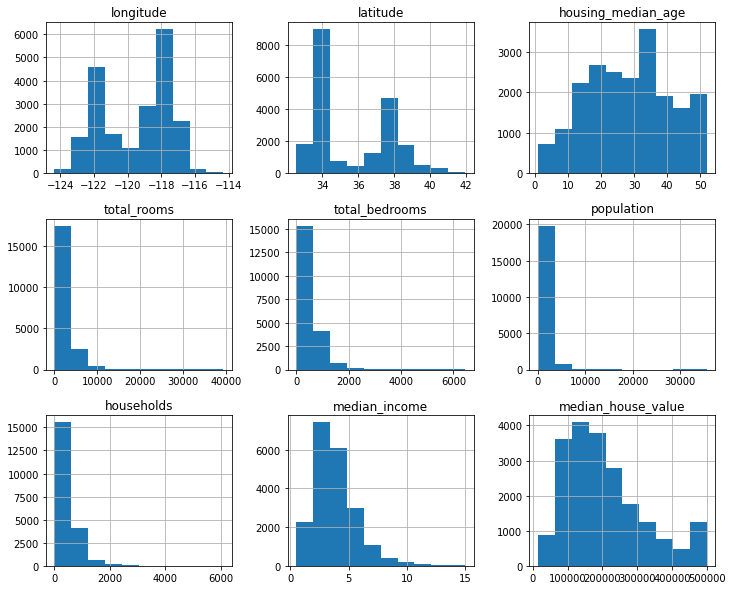

In [9]:
df.hist(figsize=(12,10))
plt.show()

In [10]:
# Cálculo da matriz de correlação (r de Pearson) para os pares de variáveis
matriz_correl = df.corr()
matriz_correl

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [11]:
# Correlação de cada atributo com a variável-alvo
matriz_correl['median_house_value'].sort_values(ascending=False)[1:]

median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

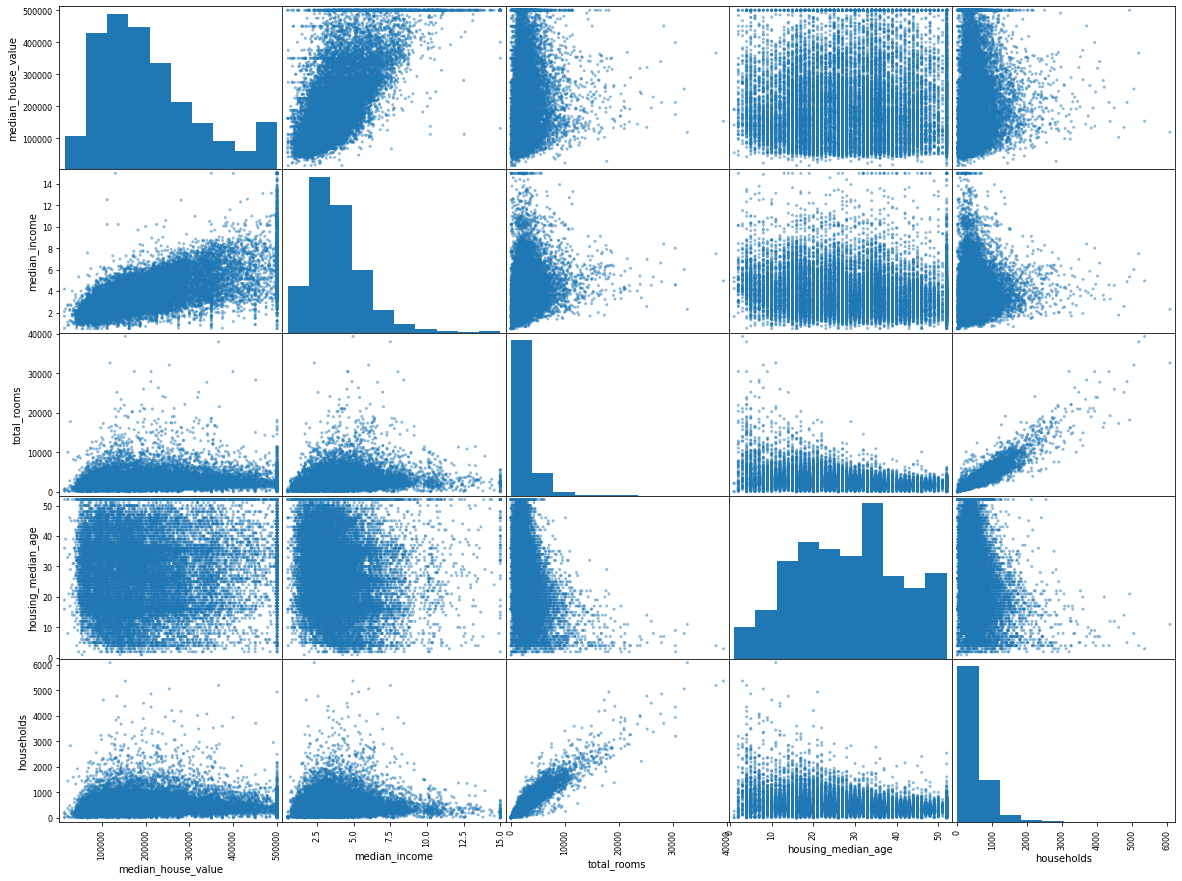

In [12]:
# Graficos de dispersao entre as variaveis com melhores correlacoes
from pandas.plotting import scatter_matrix
variaveis_selecionadas = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'households']
scatter_matrix(df[variaveis_selecionadas],figsize=(20,15))
plt.show()

### Respostas 11 e 12
O coeficiente de correlação entre a variável criada e o alvo é de -0.024.

A variável criada não possui coeficiente linear relevante em relação à variável-alvo. Sendo assim, não há vantagem prática de utilizá-la no modelo.

In [13]:
df['tamanho_lares'] = df['population']/df['households']
df['tamanho_lares'].describe()

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: tamanho_lares, dtype: float64

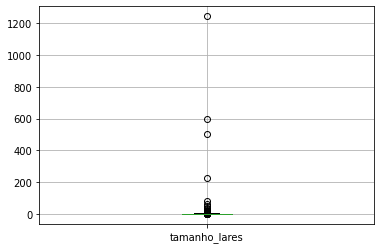

In [14]:
df[['tamanho_lares']].boxplot()

In [15]:
df[['tamanho_lares','median_house_value']].corr()


,tamanho_lares,median_house_value
tamanho_lares,1.000000,-0.023737
median_house_value,-0.023737,1.000000
